In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('mall_customers.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.count

<bound method DataFrame.count of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [80]:
df.iloc[:,-3:]= df.iloc[:,-3:].apply(pd.to_numeric, errors='coerce')

In [44]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

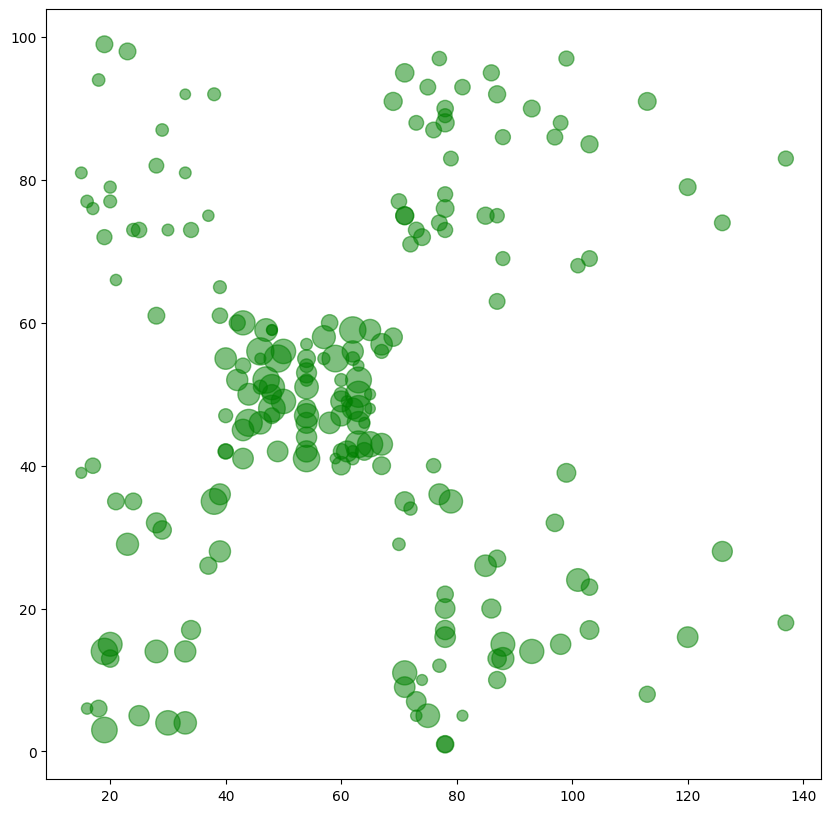

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],s=df['Age']**1.4, alpha=0.5,color='green')
plt.show()

In [109]:
X=df.iloc[:,1:]
X.iloc[:,1:]=StandardScaler().fit_transform(X.iloc[:,1:])

In [110]:
X = pd.get_dummies(X, columns=['Gender'])
X

,Age,Annual Income (k$),Spending Score (1-100),cluster,Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.893914,0,1
1,-1.281035,-1.738999,1.195704,-0.392293,0,1
2,-1.352802,-1.700830,-1.715913,0.893914,1,0
3,-1.137502,-1.700830,1.040418,-0.392293,1,0
4,-0.563369,-1.662660,-0.395980,0.893914,1,0
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1.537017,1,0
196,0.441365,2.497807,-0.861839,0.250810,1,0
197,-0.491602,2.497807,0.923953,1.537017,0,1
198,-0.491602,2.917671,-1.250054,0.250810,0,1


In [111]:
X_k=X[['Annual Income (k$)','Spending Score (1-100)']].values

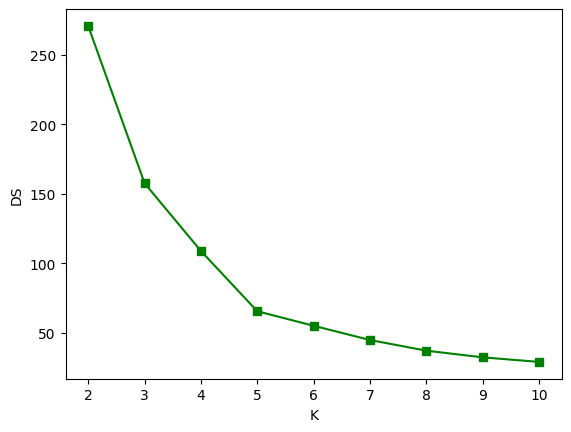

In [127]:
limit = int((X_k.shape[0]//2)**0.5)
ds = {}
for k in range(2,limit+1):
    model = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    model.fit(X_k)
    ds[k] = model.inertia_
plt.plot(ds.keys(), ds.values(), 'gs-')
plt.xlabel('K')
plt.ylabel('DS')
plt.show()


In [136]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 3 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 3 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 3 0 0 0 3 3 3 3 0 3 3 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [137]:
df['cluster']=k_means.labels_

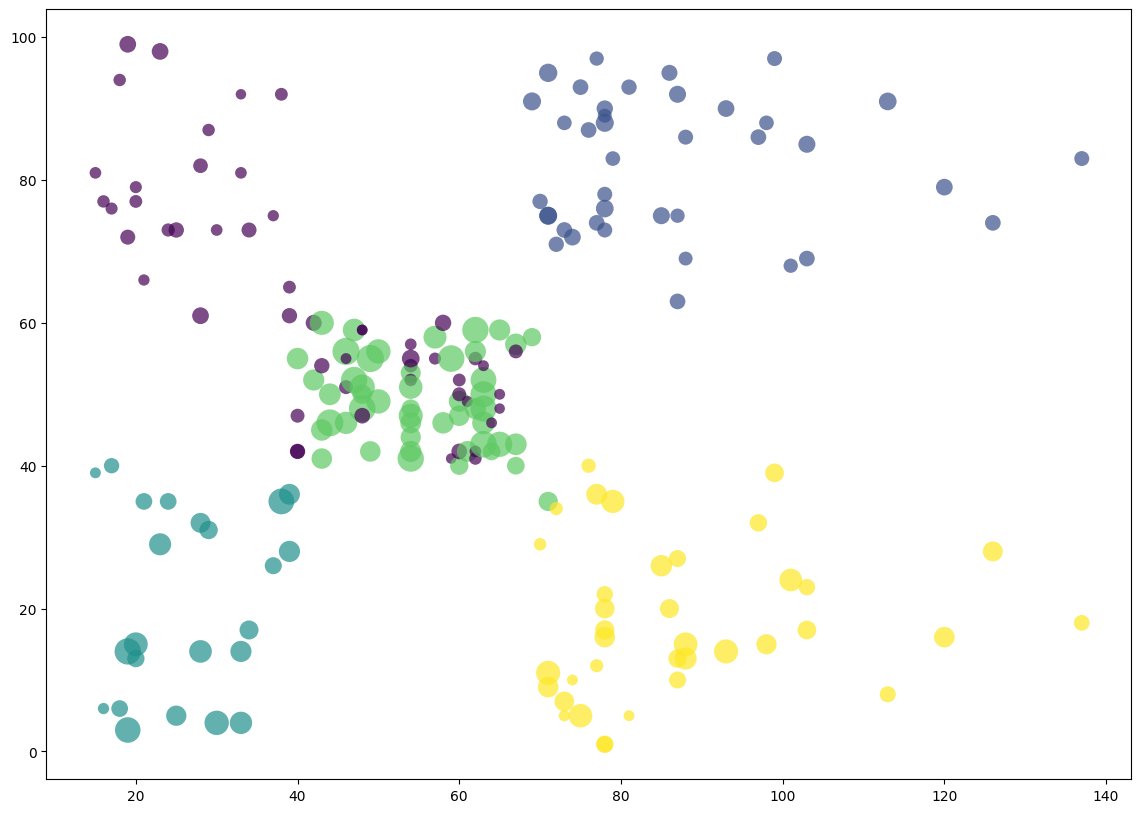

In [138]:
plt.figure(figsize=(14,10))
cols = {'Female': 'pink', 'Male': 'blue'}
c=df['Gender'].map(cols)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],s=df['Age']**1.4, alpha=0.7,c=df['cluster'],linewidth=0,edgecolor=c)
plt.show()